In [4]:
#Load libraries
from sklearn.datasets import load_boston
import copy 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

#Load data
boston = load_boston()
X, y = load_boston(return_X_y=True)

#Create data frame
columns = boston.feature_names
df = pd.DataFrame(X, columns = columns)

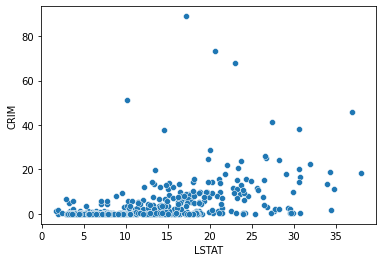

In [5]:
#Scatterpblot
ax = sns.scatterplot(x="LSTAT", y="CRIM", data=df)

In [6]:
#Mahalonibis Distance

def mahalanobis_method(df):
    #M-Distance
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))    #degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

outliers_mahal_bi, md_bi = mahalanobis_method(df=df_bivariate)

In [7]:
outliers_mahal_bi

[152,
 155,
 214,
 353,
 364,
 365,
 367,
 380,
 405,
 410,
 414,
 418,
 488,
 489,
 490,
 491,
 492]

In [8]:
md_bi

array([ 2.7475433 ,  2.1475826 ,  2.22992563,  2.63223623,  2.67156878,
        2.5462608 ,  2.46143968,  3.77489539,  5.06973569,  3.69799652,
        4.10412371,  3.30637776,  2.80134502,  2.44191765,  2.52209363,
        2.46244022,  3.20877319,  2.22434797,  3.30961606,  2.28046321,
        2.87040716,  2.38884962,  2.64605694,  2.8755343 ,  2.61194437,
        2.66411226,  2.59936324,  2.66876963,  2.75200453,  2.5910753 ,
        2.96271267,  2.83708257,  4.06964179,  2.63507398,  3.23413335,
        1.99259015,  1.97320639,  2.20668974,  2.60402024,  3.83622642,
        3.94378887,  3.54555118,  3.24787949,  3.26969881,  2.12409317,
        2.38011777,  2.51857979,  3.17419272,  4.9543289 ,  2.68126979,
        2.34115426,  2.58691769,  2.3363676 ,  2.43508216,  4.96471496,
        4.13494498,  3.80277052,  4.39757374,  2.85747642,  2.4321185 ,
        3.0076083 ,  3.78922642,  3.08253783,  3.06905812,  4.27726848,
        3.44834958,  3.69469345,  2.46168453,  2.36895698,  2.20

In [ ]:
outliers_mahal, md = mahalanobis_method(df=df)

In [ ]:
#Robust Mahalonibis Distance
def robust_mahalanobis_method(df):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    #Robust M-Distance
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

outliers_mahal_rob_bi, md_rb_bi = robust_mahalanobis_method(df=df_bivariate)


In [ ]:
outliers_mahal_rob, md_rb = robust_mahalanobis_method(df=df)

In [ ]:
#Visualization
#You need deep copy otherwise cannot 
#add column to a slice of a DataFrame
df_bi_cp = copy.deepcopy(df_bivariate) 

#Add md and robust md to copy of dataframe
df_bi_cp['md'] = md_bi
df_bi_cp['md_robust'] = md_rb_bi

def flag_outliers(df, outliers):
    flag = []
    for index in range(df.shape[0]):
        if index in outliers:
            flag.append(1)
        else:
            flag.append(0)
    return flag

#Flag outliers with 1, others with 0
df_bi_cp['flag'] = flag_outliers(df_bivariate, outliers_mahal_bi)
df_bi_cp['flag_rob'] = flag_outliers(df_bivariate, outliers_mahal_rob_bi)

#MD classic
ax = sns.scatterplot(x="LSTAT", y="CRIM", hue='flag', data=df_bi_cp)


In [ ]:
#MD robust
ax = sns.scatterplot(x="LSTAT", y="CRIM", hue='flag_rob', data=df_bi_cp)